# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 6 - Multilayer Perceptron (MLP) ##
![cnn_model.png](https://images.prismic.io/turing/659d78a0531ac2845a2742df_need_deep_neural_networks_5_11zon_54d2f93a48.webp?auto=format,compress)

# **Lab Tasks**

The objective of this lab is to create your custom MLP model to predict house prices in California.

A brief rundown of the tasks is shown below:
1. Importing and visualizing dataset
2. Data preprocessing (Task 1)
3. Model building (Task 2)
4. Model compilation and training (Task 3)
5. Model evaluation

More information on each section will follow as you progress with your lab.

Hope you enjoy the lab and best of luck!

# Importing and Visualizing the California Housing Dataset

Let's take a look at the California Housing dataset, which will be used in this lab assignment to predict house prices using regression.

This is a popular dataset which consists of 20,640 data samples, each described by a total of 9 features (8 features and 1 target label).

Information on the 8 features are below:
1. MedInc:        median income in block group
2. HouseAge:      median house age in block group
3. AveRooms:      average number of rooms per household
4. AveBedrms:     average number of bedrooms per household
5. Population:    block group population
6. AveOccup:     average number of household members
7. Latitude:     block group latitude
8. Longitude:    block group longitude

The target value is the Median House Value (MedHouseVal), expressed in hundreds of thousands of dollars.

Further information on the dataset can be found here: https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

Run the code cells below to download and visualize your dataset.

**Do not modify the code cells in this section.**


In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam
from keras import optimizers
from keras import regularizers
import os
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
if __name__ == "__main__":
  # Import libraries
  import matplotlib.pyplot as plt
  import seaborn as sns
  import matplotlib.pyplot as plt
  import seaborn as sns

In [ ]:
if __name__ == "__main__":
  # Fetch and download data from sklearn.
  house_dataset = fetch_california_housing(data_home="./", download_if_missing=True)

  # The dataset is already seperated in X and y data
  data = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names)
  labels = pd.Series(house_dataset.target, name="MedHouseVal")

  # Let us combine the X and y data to have a single dataframe for easier visualization.
  california_data = data.join(labels)

In [ ]:
if __name__ == "__main__":
  california_data.head()

In [ ]:
if __name__ == "__main__":
  # Check attribute information
  # As you can see, there are no null values and all are numeric.
  california_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


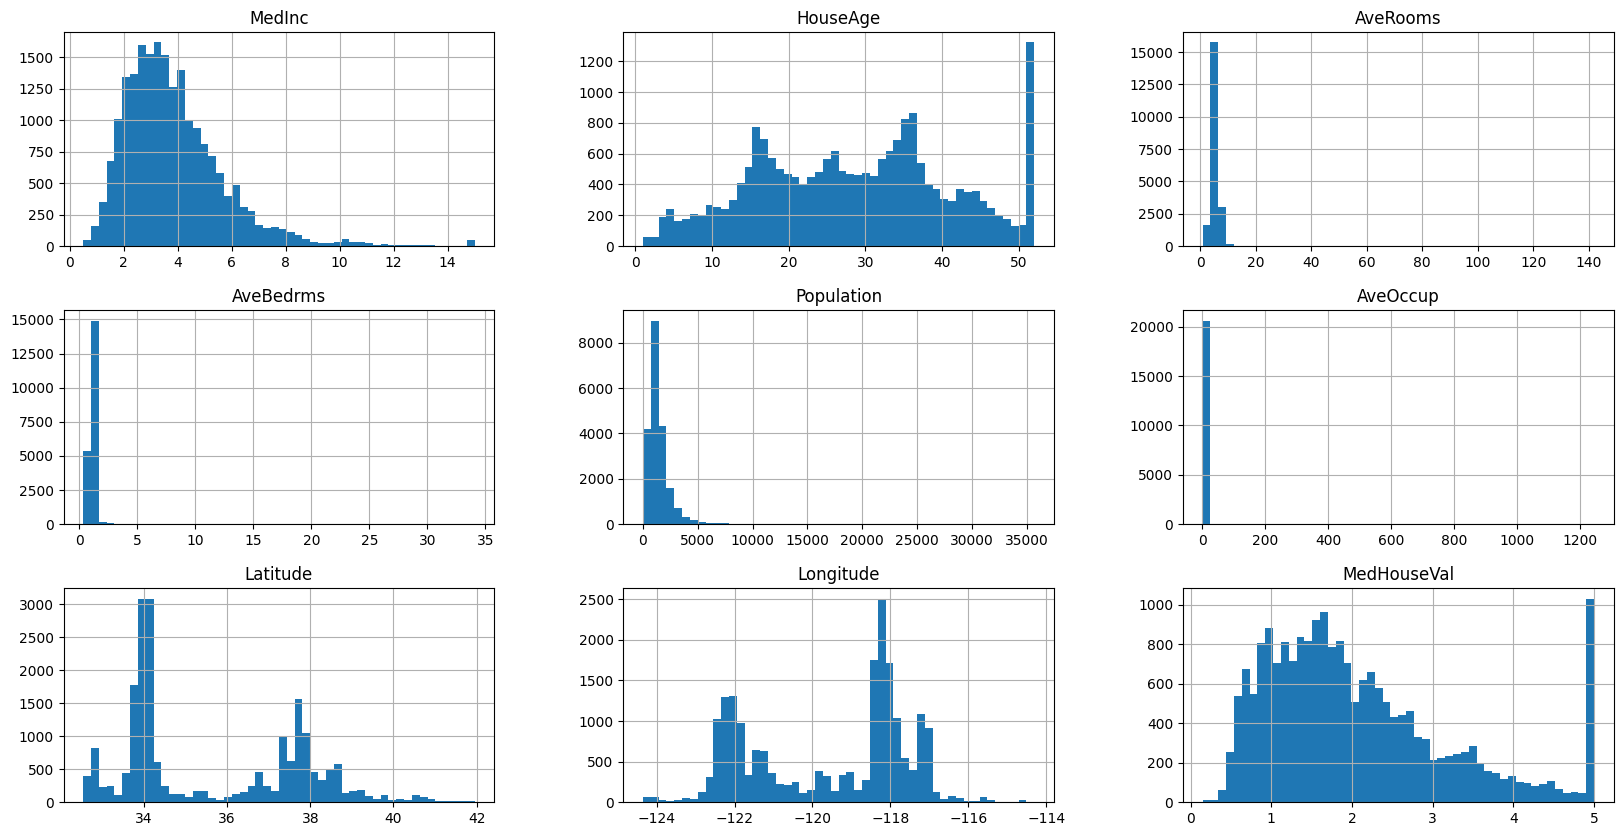

In [ ]:
if __name__ == "__main__":
  # Visualize distribution for each feature

  california_data.hist(bins=50, figsize=(20,10))
  plt.show()

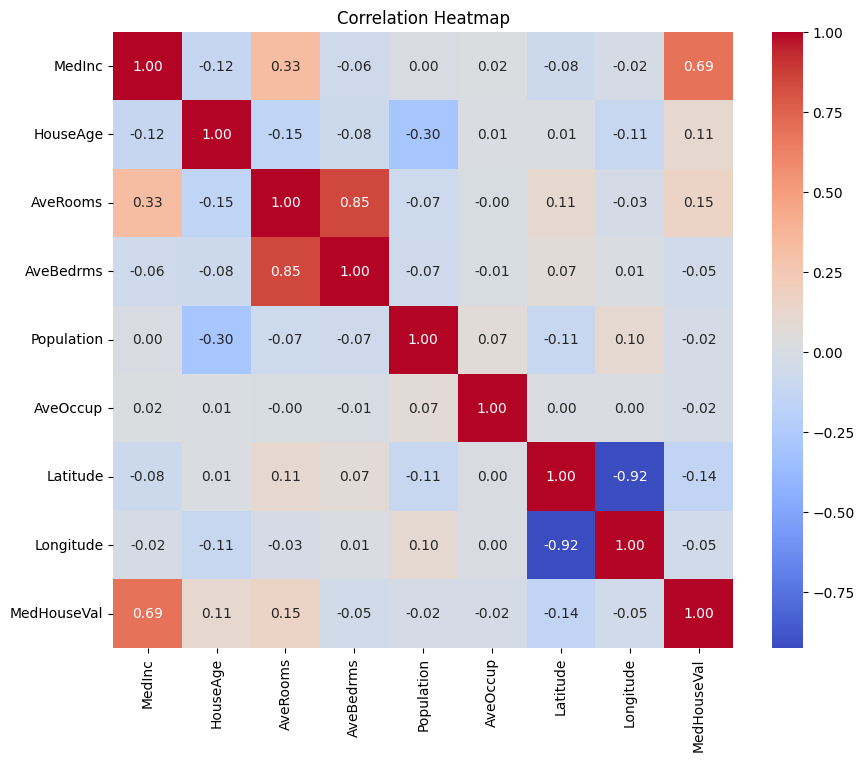

In [ ]:
if __name__ == "__main__":
  # Visualize correlation with respect to each attribute

  plt.figure(figsize=(10, 8))
  california_data['MedHouseVal'] = labels
  sns.heatmap(california_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
  plt.title('Correlation Heatmap')
  plt.show()

# Task 1 Data Preprocessing

The following is what we have learnt from the data exploration above:
1. No null values
2. All are numeric data types (float64)
3. A mix of linear and non-linear relationships is seen in the heatmap.

According to the feature distributions and the heatmap, we cannot rely on traditional regression models such as Linear Regression due to the presence of non-linear relationships; we would need to use a model which can capture non-linear relationships -> MLP!

Therefore, the major preprocessing we need to carry out is to normalize our data to standard normal distribution to avoid any bias towards certain features. Additionally, we need to split our data into train and test datasets before building the model.

In [ ]:
def standard_scalar(x, mean, std):
  """
  Standardizes the input Pandas DataFrame using Z-score normalization.

  This function normalizes the input data using the provided mean and standard deviation.
  Standardization ensures that each feature has a mean of 0 and a standard deviation of 1,
  which helps improve the performance of machine learning models, especially those relying
  on gradient-based optimization.

  Parameters:
  ----------
  data : pandas.DataFrame
      The dataset containing feature values, where each column represents a feature,
      and each row represents a sample.
  mean : pandas.Series
      The mean values of each feature, computed from the training set.
      Using the training mean ensures consistency and prevents data leakage.
  std : pandas.Series
      The standard deviation of each feature, computed from the training set.
      Avoids data imbalance and ensures a normalized distribution.

  Returns:
  ----------
  standardized_data : pandas.DataFrame
    The standardized dataset with each feature having a mean close to 0
    and a standard deviation close to 1.
  """
  ###############################################################################
  # TODO: your code starts here
  result = (x-mean)/std
  return result
  # TODO: your code ends here
  ###############################################################################

In [ ]:
def preprocess(data):

  ###############################################################################
  # TODO: your code starts here
  # Hint: When using train_test_split, please set random_state to 42 to ensure the same dataset split as zinc
  # Hint: Please normalize both the training and test data using the mean and standard deviation of X and y from the training set. Normalizing y helps the model converge. We will grade based on this setting


  # split data into features and target label
  features = data.drop(columns=data.columns[-1])
  label = data[data.columns[-1]]
  # split data into train and testing sets (use 20% for test size)
  X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
  # normalize your dataset

  meanX = np.mean(X_train, axis=0)
  meanY = np.mean(y_train, axis=0)
  stdX = np.std(X_train, axis=0)
  stdY = np.std(y_train, axis=0)
  X_train = standard_scalar(X_train, meanX, stdX)
  X_test = standard_scalar(X_test, meanX, stdX)
  y_train = standard_scalar(y_train, meanY, stdY)
  y_test = standard_scalar(y_test, meanY, stdY)

  # TODO: your code ends here
  ###############################################################################

  return X_train, X_test, y_train, y_test

In [ ]:
if __name__ == "__main__":
  # Run the function and print the corresponding shapes.
  X_train, X_test, y_train, y_test = preprocess(california_data)
  print(type(X_train), type(X_test), type(y_train), type(y_test), sep="\n", end="\n\n")
  print(X_train.iloc[:3, :3], X_test.iloc[:3, :3], y_train.iloc[:3], y_test.iloc[:3], sep="\n\n")

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>

         MedInc  HouseAge  AveRooms
14196 -0.326196  0.348490 -0.174916
8267  -0.035843  1.618118 -0.402835
17445  0.144701 -1.952710  0.088216

         MedInc  HouseAge  AveRooms
20046 -1.155085 -0.286324 -0.520686
3024  -0.708659  0.110435 -0.165815
15663 -0.210402  1.856173 -0.610765

14196   -0.901189
8267     1.512771
17445   -0.299213
Name: MedHouseVal, dtype: float64

20046   -1.379484
3024    -1.395917
15663    2.532508
Name: MedHouseVal, dtype: float64


# Task 2 Model Building

It is now time to finally build our custom MLP model. You can use the following layers to create your model:

* Fully-connected (`Dense`)
* Dropout (`Dropout`)

Additionally, feel free to play around with different activation functions, number of neurons, regularizers, number of hidden layers, etc.

**Note that you do not have unlimited computing resources and you should avoid creating models that are too large to run on Google Colab.**


In [ ]:
def create_model():
  model = Sequential()

  ###############################################################################
  # TODO: your code starts here
  # Hint: you need to take into account the input_shape for the first layer.
  # Hint: Do not create models with more than 10,000 parameters. ZINC will not evaluate models with more than 10,000 parameters.
  model.add(layers.Input(shape=(8,)))
  model.add(layers.Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
  model.add(layers.Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
  model.add(layers.Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
  model.add(layers.Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
  model.add(layers.Dense(units=1))
  # TODO: your code ends here
  ###############################################################################

  return model

In [ ]:
if __name__ == "__main__":
  # Your model summary
  model = create_model()
  model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,905 (30.88 KB)

 Trainable params: 7,905 (30.88 KB)

 Non-trainable params: 0 (0.00 B)

# Task 3 Model Compilation


It is now time to complete the code below to compile your model before training.

You can use any optimizer, loss function, and metrics to train your model. However, we recommend the following:
1. Optimizer = Adam
2. Loss = Mean Squared Error
3. Metrics = Mean Absolute Error and Mean Squared Error (https://machinelearningmastery.com/regression-metrics-for-machine-learning/)

Remember to also complete the model.fit function with your hyperparameters. While you are allowed to explore other options, we recommend having the number of epochs close to 100, if not more.

In [ ]:
def model_compile(model):
  ###############################################################################
  # TODO: your code starts here

  # Fill the model.compile() function below
  adam_optimizer = Adam(learning_rate=0.001)
  model.compile(optimizer=adam_optimizer,
                loss=keras.losses.MeanSquaredError(),
                metrics=['mae', 'mse'])
  # TODO: your code ends here
  ###############################################################################
  return model

In [ ]:
if __name__ == "__main__":
  model = model_compile(model)

In [ ]:
if __name__ == "__main__":
  # You can adjust the epochs, batch size, and validation_split to achieve better results.
  history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2)
  model.save_weights("mlp_model.weights.h5")

Epoch 1/150
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.9216 - mae: 0.5485 - mse: 0.6485 - val_loss: 0.5659 - val_mae: 0.4174 - val_mse: 0.3539
Epoch 2/150
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.5032 - mae: 0.3915 - mse: 0.3007 - val_loss: 0.4835 - val_mae: 0.3916 - val_mse: 0.3025
Epoch 3/150
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.4558 - mae: 0.3718 - mse: 0.2795 - val_loss: 0.4525 - val_mae: 0.3850 - val_mse: 0.2890
Epoch 4/150
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.4124 - mae: 0.3559 - mse: 0.2525 - val_loss: 0.4176 - val_mae: 0.3663 - val_mse: 0.2676
Epoch 5/150
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3961 - mae: 0.3540 - mse: 0.2488 - val_loss: 0.4161 - val_mae: 0.3678 - val_mse: 0.2768
Epoch 6/150
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3814 - mae: 0.3472 - mse: 0.2445 - val_loss: 0.3956 - val_mae: 0.3676 - val_mse: 0.2657
Epoch 7/150
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3658 - mae: 0.3417 - mse: 0.23

# Model Evaluation

It is now time to run the code cells below to generate predictions of house prices. This will then be evaluated with the testing labels using 3 metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R2 score.

The R2 score is a statistical measure that tells us how well our model fits the data. It has a range between 0 and 1, with 1 indicating that our model fits perfectly well with the data. It is important to note that a negative R2 value means your model has not understood the data distribution at all.

Finally, you can run the last code cell to plot an Actual vs. Predicted values graph. This data visualization technique is very useful in regression tasks, as it showcases how well the predictions fit the regressed diagonal line. If your prediction points are close to the diagonal line, it means you have a high R2 score.

**Do not change the code cells in this section.**

In [ ]:
if __name__ == "__main__":
  # Predict median house prices based on testing data
  # model.load_weights("mlp_model.weights.h5")
  y_pred = model.predict(X_test).flatten()

  # Generate MSE, RMSE, and R2 scores.
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)
  # The r2 results should be the same locally and on Zinc, as long as the code is complete and follows the requirements.
  print("mse =", mse, ", rmse =", rmse, ", r2 =", r2)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
mse = 0.21436461610953483 , rmse = 0.46299526575283123 , r2 = 0.7813217453847829


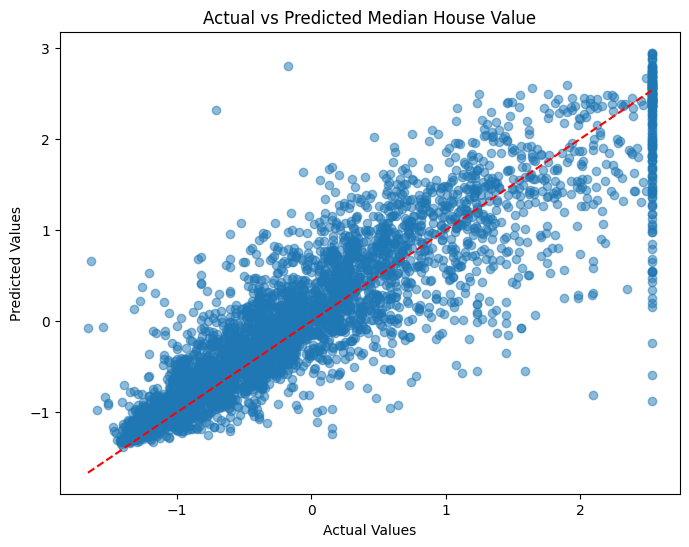

In [ ]:
if __name__ == "__main__":
  # Plot Actual Vs. Predicted Median House Values
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
  plt.title('Actual vs Predicted Median House Value')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.show()

## **Grading Scheme**

Please export your notebook on Colab as `lab6_tasks.py` (File -> Download -> Download .py), and submit it together with your `mlp_model.weights.h5` model weight file.


* You get **3 points** for data preprocessing (task 1)
* You get **2 points** for the valid implementation of the MLP model (task 2)
* You get **1 point** for model compilation (task 3)
* You get **1 point** for achieving an R2 score of at least 0.70
* You get **2 points** for achieving an R2 score of at least 0.75
* You get **3 points** (full mark) for achieving an R2 score of at least 0.78